<a href="https://colab.research.google.com/github/laresamdeola/ML-Mastery/blob/main/Building_a_KNN_Model_for_predicting_if_a_customer_would_purchase_Social_Media_Ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [5]:
print(X[1:10])

[[    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [6]:
print(y[1:10])

[0 0 0 0 0 0 1 0 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_train[0:9])

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]]


In [10]:
print(X_test[0:9])

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]]


In [11]:
print(y_train[0:9])

[1 0 0 0 1 1 0 1 1]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)

In [18]:
print(cm)

[[52  7]
 [ 6 15]]


In [19]:
print(acc)

0.8375


In [20]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [24]:
print(fpr, tpr, threshold)

[0.         0.         0.01724138 0.10344828 0.31034483 0.60344828
 1.        ] [0.         0.40909091 0.5        0.68181818 0.81818182 1.
 1.        ] [2.  1.  0.8 0.6 0.4 0.2 0. ]


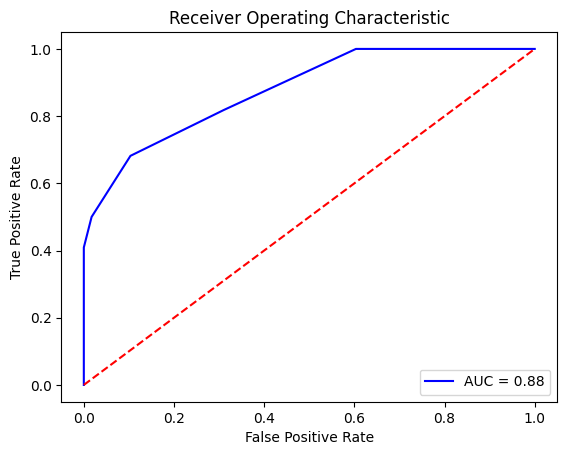

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()